<a href="https://colab.research.google.com/github/bodamohannaik/DLAI-TF-DPC/blob/master/C2/W4/rock_paper_scissors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

# Download Dataset

In [2]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip
!ls

--2022-05-12 17:13:43--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.9.208, 172.217.13.80, 172.253.62.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.9.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘rps.zip.3’

rps.zip.3           100%[===================>] 191.38M   112MB/s    in 1.7s    

2022-05-12 17:13:45 (112 MB/s) - ‘rps.zip.3’ saved [200682221/200682221]

rps-test-set.zip    rps.zip    rps.zip.2  sample_data
rps-test-set.zip.1  rps.zip.1  rps.zip.3


In [3]:
!unzip -q rps.zip -d /tmp/training

replace /tmp/training/rps/paper/paper01-000.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [4]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip
!ls

--2022-05-12 17:13:54--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.122.128, 172.253.63.128, 142.251.16.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.122.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘rps-test-set.zip.2’

rps-test-set.zip.2  100%[===================>]  28.15M  66.1MB/s    in 0.4s    

2022-05-12 17:13:55 (66.1 MB/s) - ‘rps-test-set.zip.2’ saved [29516758/29516758]

rps-test-set.zip    rps-test-set.zip.2	rps.zip.1  rps.zip.3
rps-test-set.zip.1  rps.zip		rps.zip.2  sample_data


In [5]:
!unzip -q rps-test-set.zip -d /tmp/validation

replace /tmp/validation/rps-test-set/paper/testpaper01-00.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


# Visualize Data

In [6]:
def random_images(directory, number_of_images, target_size=None):
  files = [os.path.join(root, file) for root, dirs, files in os.walk(directory) for file in files]
  selected = np.random.choice(a=files, size=number_of_images, replace=False)
  for file in selected:
    img = tf.keras.preprocessing.image.load_img(file, target_size=target_size)
    a = tf.keras.preprocessing.image.img_to_array(img= img)
    yield a.astype(np.uint8),  os.path.basename(os.path.dirname(file))

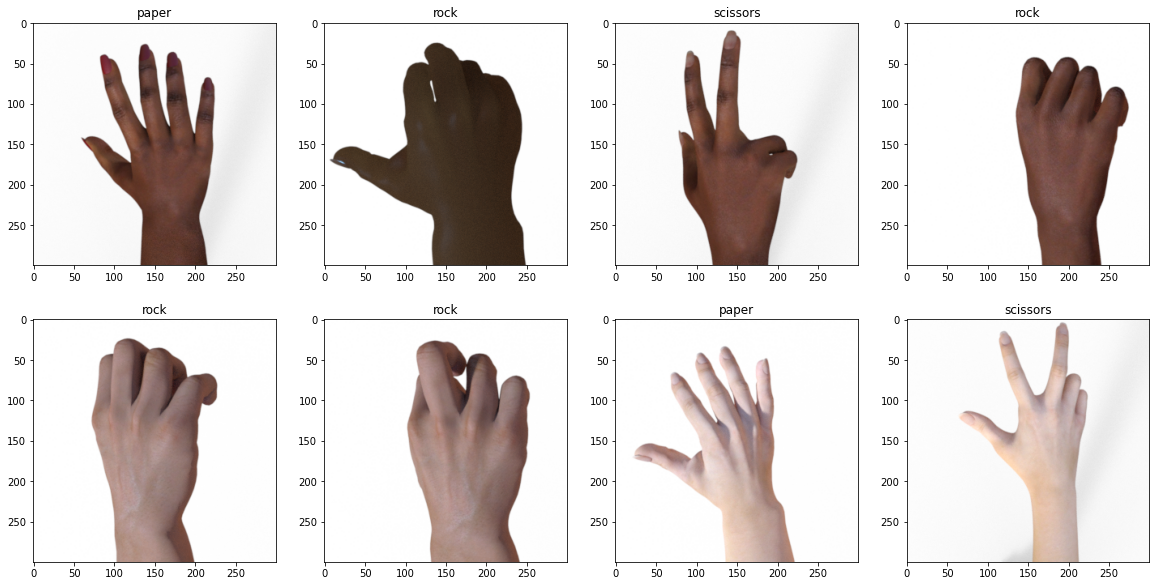

In [7]:

# training images
number_of_images = 8
fig, axs = plt.subplots(2,4, figsize=(20,10))
for i, img in enumerate(random_images(directory = '/tmp/training/rps', number_of_images=number_of_images)):
  ax = plt.subplot(2,4, i+1)
  ax.imshow(img[0])
  ax.set_title(img[1])

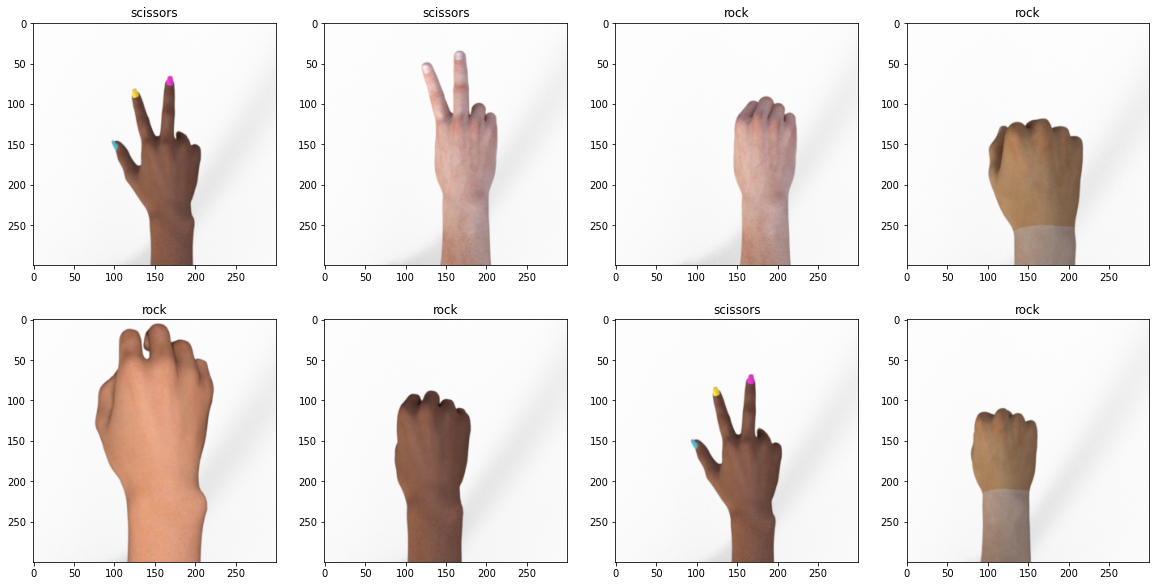

In [8]:

# training images
number_of_images = 8
fig, axs = plt.subplots(2,4, figsize=(20,10))
for i, img in enumerate(random_images(directory = '/tmp/validation/rps-test-set', number_of_images=number_of_images)):
  ax = plt.subplot(2,4, i+1)
  ax.imshow(img[0])
  ax.set_title(img[1])

# Load Dataset

In [9]:
batch_size = 32
target_size = (150, 150)
epochs = 30

In [10]:
def load_training_data(directory):
  training_idg = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=45, width_shift_range=.2,
                                                                 height_shift_range=.2, zoom_range=.2,
                                                                 horizontal_flip=True, vertical_flip=True, 
                                                                 shear_range=.2)
  train_gen = training_idg.flow_from_directory(directory=directory, target_size= target_size, batch_size= batch_size, 
                                               class_mode = 'categorical', color_mode='rgb')
  return train_gen

In [11]:
train_gen = load_training_data(directory = "/tmp/training/rps")

Found 2520 images belonging to 3 classes.


In [12]:
def load_validation_data(directory):
  validation_idg = tf.keras.preprocessing.image.ImageDataGenerator()
  validation_gen = validation_idg.flow_from_directory(directory=directory, target_size= target_size, batch_size= batch_size, 
                                               class_mode = 'categorical', color_mode='rgb')
  return validation_gen

In [13]:
validatioin_gen = load_validation_data(directory = "/tmp/validation/rps-test-set")

Found 372 images belonging to 3 classes.


# Nerual Network

In [16]:
# model 
model = tf.keras.Sequential(
    layers = [
              tf.keras.layers.Input(shape=target_size+(3,)),
              tf.keras.layers.Rescaling(scale=1/255),
              tf.keras.layers.Conv2D(filters=32, kernel_size = (3,3), activation = 'relu'),
              tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
              tf.keras.layers.Conv2D(filters=64, kernel_size = (3,3), activation = 'relu'),
              tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
              tf.keras.layers.Conv2D(filters=128, kernel_size = (3,3), activation = 'relu'),
              tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
              tf.keras.layers.GlobalMaxPooling2D(),
              tf.keras.layers.Dropout(rate = .2),
              tf.keras.layers.Dense(units=512, activation='relu'),
              tf.keras.layers.Dropout(rate = .2),
              tf.keras.layers.Dense(units=3, activation='softmax')
    ]
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)      

# Training

In [17]:
# compile
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=.001), loss= "categorical_crossentropy", metrics = ["accuracy"])
history = model.fit(train_gen , epochs = epochs, validation_data = validatioin_gen)

Epoch 1/30
79/79 [==============================] - 24s 256ms/step - loss: 1.0857 - accuracy: 0.3885 - val_loss: 0.9433 - val_accuracy: 0.7581
Epoch 2/30
79/79 [==============================] - 20s 254ms/step - loss: 0.8625 - accuracy: 0.6016 - val_loss: 0.5948 - val_accuracy: 0.7984
Epoch 3/30
79/79 [==============================] - 21s 265ms/step - loss: 0.6232 - accuracy: 0.7456 - val_loss: 0.3700 - val_accuracy: 0.9167
Epoch 4/30
79/79 [==============================] - 20s 249ms/step - loss: 0.4789 - accuracy: 0.8020 - val_loss: 0.2988 - val_accuracy: 0.9247
Epoch 5/30
79/79 [==============================] - 20s 249ms/step - loss: 0.4030 - accuracy: 0.8357 - val_loss: 0.4931 - val_accuracy: 0.8226
Epoch 6/30
79/79 [==============================] - 21s 260ms/step - loss: 0.3270 - accuracy: 0.8813 - val_loss: 0.2787 - val_accuracy: 0.8978
Epoch 7/30
79/79 [==============================] - 20s 249ms/step - loss: 0.3652 - accuracy: 0.8595 - val_loss: 0.2919 - val_accuracy: 0.9086

# Plot Loss and Accuarcy

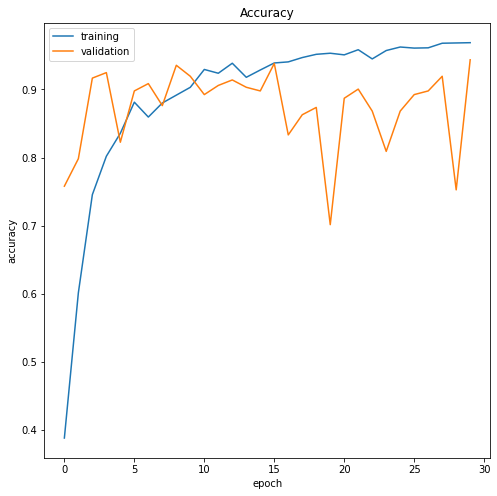

In [19]:
# accuracy 
fig, ax = plt.subplots( figsize = (8, 8))
ax.plot(history.history['accuracy'], label = 'training')
ax.plot(history.history['val_accuracy'], label = 'validation')
ax.set_title("Accuracy")
ax.set_xlabel("epoch")
ax.set_ylabel("accuracy")
ax.legend()

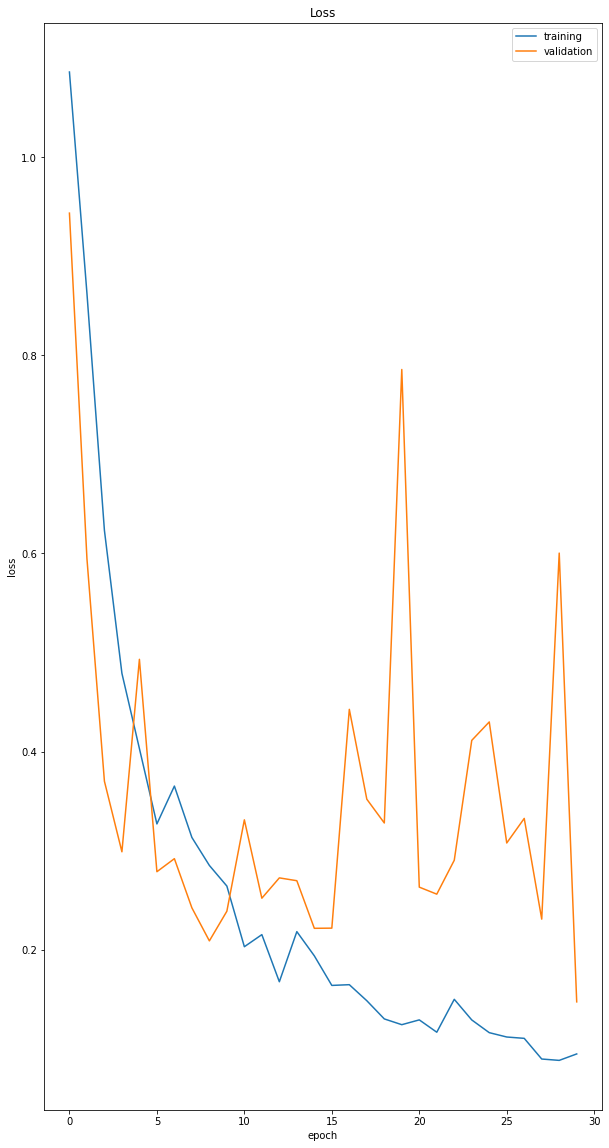

In [20]:
# loss 
fig, ax = plt.subplots( figsize = (10, 20))
ax.plot(history.history['loss'], label = 'training')
ax.plot(history.history['val_loss'], label = 'validation')
ax.set_title("Loss")
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.legend()